In [86]:
import pandas as pd

import os

os.listdir()
# os.getcwd()


['.ipynb_checkpoints',
 'df_year.csv',
 'df_year1.csv',
 'new.ipynb',
 'Output',
 'SalesAnalysis.ipynb',
 'Sales_Data']

In [87]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")


In [88]:

# df.isnull().sum()

# df= df.dropna(how="all")

# df.info()




In [89]:
# os.listdir("./Sales_Data")

In [90]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")



df_year= pd.DataFrame()

files = [file for file in os.listdir("./Sales_Data")]

for file in files[1:]:
    df =pd.read_csv("./Sales_Data/"+ file)
    df_year= pd.concat([df_year, df])
    
    
df_year.to_csv("df_year1.csv", index= False)



In [91]:
df_year= pd.read_csv("df_year.csv")


# Dataframe for all the 12 months sales combined
# df_year


In [92]:
# checking for null cells
# df_year.isnull().sum()

df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [93]:
# dropping cells with nan
df_year= df_year.dropna(how="all")

# df_year.isnull().sum()

In [94]:
# to get month we have to parse the first two digits in the order date column

# add an extra column for month



df_year= df_year[df_year["Order Date"].str[0:2]!= "Or"]

df_year["Month"]= df_year["Order Date"].str[0:2]

df_year["Month"]= df_year["Month"].astype("int32")

# df_year





In [95]:
# convert price Each and Quantity ordered to numeric

df_year["Quantity Ordered"] = pd.to_numeric(df_year["Quantity Ordered"])

df_year["Price Each"] = pd.to_numeric(df_year["Price Each"])


In [96]:
# add a sales column

df_year["Sales"] = df_year["Quantity Ordered"] * df_year["Price Each"]

### Find month with the highest sales and how much was the sales


In [164]:
# results= df_year.groupby("Month").sum()

# results

Text(0.5, 1.0, 'Total sales in USD($) by Months')

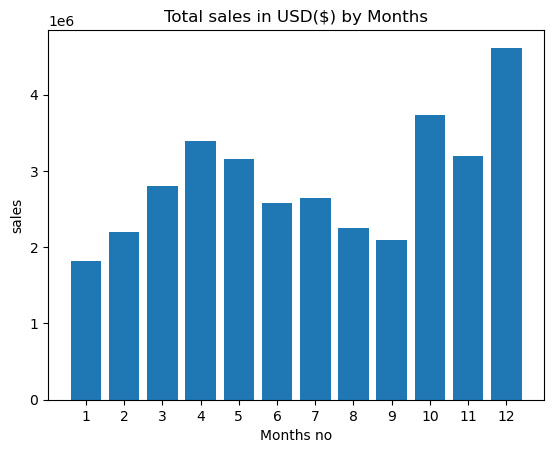

In [98]:
import matplotlib.pyplot as plt

Months= range(1,13)
 

plt.bar(Months,results["Sales"] )
plt.xlabel("Months no")
plt.ylabel("sales")

plt.xticks(Months)

plt.title("Total sales in USD($) by Months")


In [99]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


### What city had the highest number of sales

In [104]:
# # add a column for city

df_year["city"] = df_year["Purchase Address"].apply(lambda x: x.split(",")[1])

# # alternatively it can be done like this 

# def get_city(address):
#     return address.split(",")[1]

# def get_state(address):
#     return address.split(",")[2].split(" ")[1]

# df_year["city"] = df_year["Purchase Address"].apply(lambda x: get_city(x) + " "+ "(" + get_state(x) +")")

# df_year

# # sales_by_city= df_year.groupby("city").sum()



# cities = [city for city, df in df_year.groupby("city")]
df_year


NameError: name 'city' is not defined

([<matplotlib.axis.XTick at 0x1c957b6e0e0>,
 [Text(0.0, 0, ' Dallas (TX)'),
  Text(1.0, 0, ' Boston (MA)'),
  Text(2.0, 0, ' Los Angeles (CA)'),
  Text(3.0, 0, ' San Francisco (CA)'),
  Text(4.0, 0, ' Seattle (WA)'),
  Text(5.0, 0, ' Atlanta (GA)'),
  Text(6.0, 0, ' New York City (NY)'),
  Text(7.0, 0, ' Portland (OR)'),
  Text(8.0, 0, ' Austin (TX)'),
  Text(9.0, 0, ' Portland (ME)')])

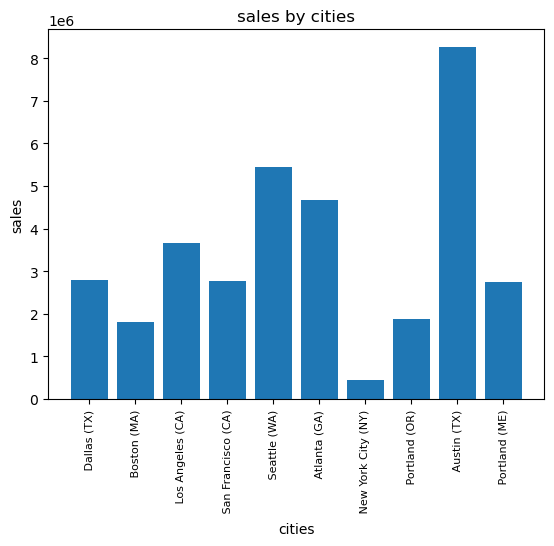

In [101]:
plt.bar(cities, sales_by_city["Sales"])

plt.xlabel("cities")
plt.ylabel("sales")

plt.title("sales by cities")

plt.xticks(cities, rotation= "vertical", size= 8)

In [102]:
df_year

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


### Question 3  what time should we display advertisement to maximize the likelihood of customers buying product

In [103]:
df_year["Order Date"]= pd.to_datetime(df_year["Order Date"])

In [107]:
df_year["hour"]= df_year["Order Date"].dt.hour

In [119]:
sales_by_hour= df_year.groupby("hour").sum()

sales_by_hour

C:\Users\fatinikun\AppData\Local\Temp\ipykernel_50360\2040366490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_hour= df_year.groupby("hour").sum()


,Quantity Ordered,Price Each,Month,Sales
hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


Text(0.5, 1.0, 'Line chart to show when maximium sales occured during the day')

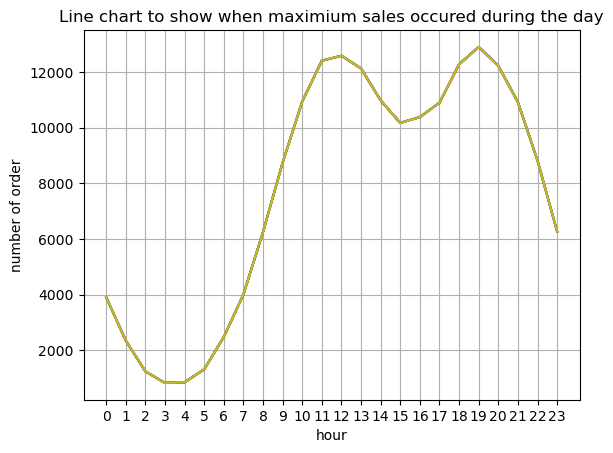

In [134]:
# sales_by_hour

hours = [hour for hour, df in df_year.groupby("hour")]

# hours

# print(df_year.groupby(["hour"]).count())

plt.plot(hours, df_year.groupby(["hour"]).count())

plt.xticks(hours)

plt.grid()

plt.xlabel("hour")

plt.ylabel("number of order")

plt.title("Line chart to show when maximium sales occured during the day")

### what product are most often sold together

In [149]:
df= df_year[df_year["Order ID"].duplicated(keep=False)]

df["grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df

C:\Users\fatinikun\AppData\Local\Temp\ipykernel_50360\3741399458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


### What product sold the most and why do you think it sold most?

In [159]:
dp= df_year.groupby("Product").sum()
dp

C:\Users\fatinikun\AppData\Local\Temp\ipykernel_50360\3979313571.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dp= df_year.groupby("Product").sum()


,Quantity Ordered,Price Each,Month,Sales,hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


In [163]:
dp_2= df_year.groupby("Product").mean()

dp_2

C:\Users\fatinikun\AppData\Local\Temp\ipykernel_50360\998162607.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dp_2= df_year.groupby("Product").mean()


,Quantity Ordered,Price Each,Month,Sales,hour
Product,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458
